In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering

from luwiji.cluster import demo

# Data preparation

In [3]:
X1, y1 = demo.blob_data()
X2, y2 = demo.moon_data()
X3, y3 = demo.circle_data()

# Visualize

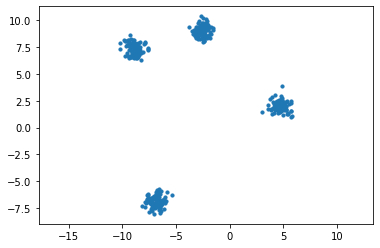

In [9]:
X = X1
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.axis("equal");

# K-means clustering

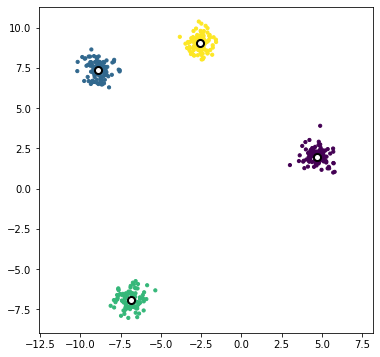

In [17]:
X = X1
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)
centre = kmeans.cluster_centers_

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.scatter(centre[:, 0], centre[:, 1], s=50, c="w", edgecolors="k", linewidths=2)
plt.axis("equal");

# K-means weakness

- kesulitan untuk menentukan K
    - Solusi: elbow analysis, silhouette score, and others
- Hanya untuk data yang bisa dirata-ratakan
    - Solusi: K-medoid
- Solusi tidak selalu optimal
- Hanya untuk data yang linearly-separable

### Moon dataset

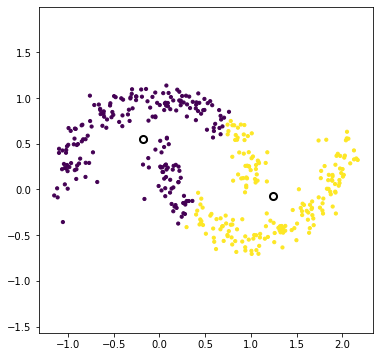

In [26]:
X = X2
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)
centre = kmeans.cluster_centers_

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.scatter(centre[:, 0], centre[:, 1], s=50, c="w", edgecolors="k", linewidths=2)
plt.axis("equal");

### Donut dataset

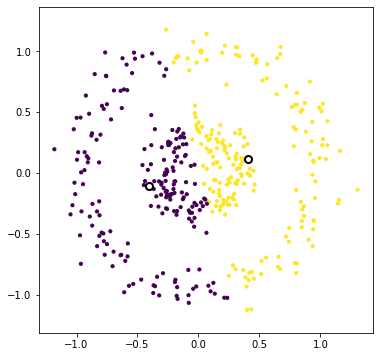

In [19]:
X = X3
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)
centre = kmeans.cluster_centers_

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.scatter(centre[:, 0], centre[:, 1], s=50, c="w", edgecolors="k", linewidths=2)
plt.axis("equal");

# Menentukan Jumlah Cluster tanpa Ground truth

### Inertia -> Elbow analysis

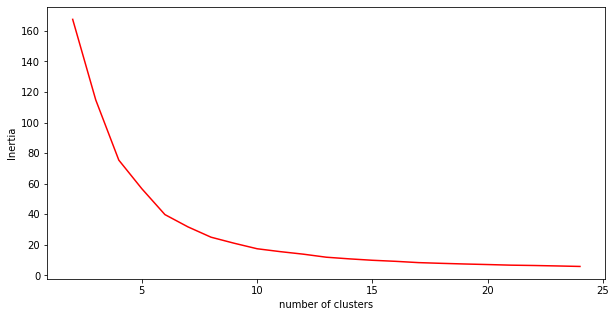

In [23]:
X = X2
score = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)    
    score.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(2, 25), score, 'r-')
plt.ylabel("Inertia")
plt.xlabel("number of clusters");

## Silhouette Score

In [21]:
from sklearn.metrics import silhouette_score

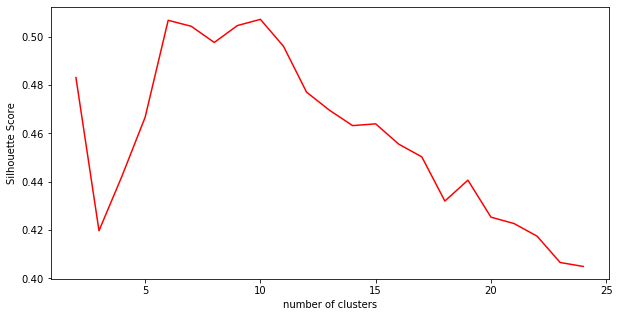

In [24]:
X = X2
score = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    
    siluet = silhouette_score(X, labels)
    score.append(siluet)
    
plt.figure(figsize=(10, 5))
plt.plot(range(2, 25), score, 'r-')
plt.ylabel("Silhouette Score")
plt.xlabel("number of clusters");

# Beyond K-means

### Spectral Clustering

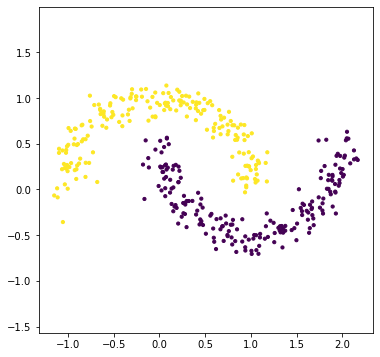

In [28]:
X = X2
sc = SpectralClustering(n_clusters=2, gamma=100)
labels = sc.fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.axis("equal");

### DBSCAN

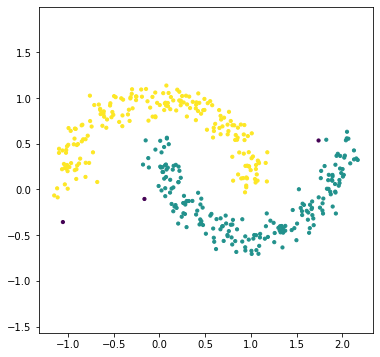

In [30]:
X = X2
dbscan = DBSCAN(eps=0.2)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.axis("equal");

### Agglomerative Hierarchical Clustering

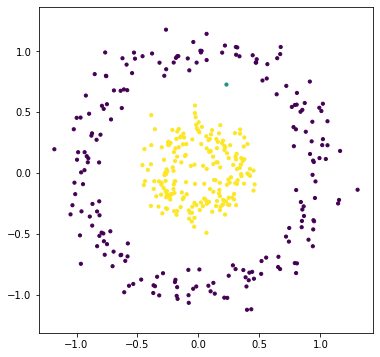

In [33]:
X = X3
hcl = AgglomerativeClustering(n_clusters=3, linkage="single")
labels = hcl.fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.axis("equal");